# Decision Trees

#EN
In this challenge, we will use decision trees in both a classification and regression task. We visualize each of these representations. We will use the `mpg` dataset. It's a car dataset.

# FR
Dans ce défi, nous allons utiliser des arbres de décision à la fois dans une tâche de classification et de régression. Nous visualiserons chacune de ces représentations. Nous utiliserons le jeu de données `mpg`. C'est un jeu de données sur les voitures.

# MISSION 1 : Regression Trees

# Exercice 1
# EN
- Drop the rows with missing values
- Drop the "name" column
- Transform the "origin" column (encode it) to represent the following:
  - USA = 0, Japan = 1, Europe = 2

# FR
- Supprimer les lignes avec des valeurs manquantes
- Supprimez la colonne "nom"
- Transformez la colonne "origine" (encodez-la) pour représenter ce qui suit :
  - États-Unis = 0, Japon = 1, Europe = 2

In [96]:
# Load in the necessary libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import graphviz
from sklearn.tree import export_graphviz

In [38]:
# EXERCICE 1
# INSERT CODE HERE
df = sns.load_dataset("mpg")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [39]:
df.shape

(398, 9)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [41]:
df.isnull().sum().sort_values()

,0
mpg,0
cylinders,0
displacement,0
weight,0
acceleration,0
model_year,0
origin,0
name,0
horsepower,6


In [42]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [43]:
df = df.drop(columns=['name'])

df = df.dropna()

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


In [44]:
df.shape

(392, 8)

In [45]:
# Rplace les vleurs de la colonne 'origin' :
df['origin'] = df['origin'].replace({'usa': 0, 'japan': 1, 'europe': 2})

df

<ipython-input-45-98046354d104>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['origin'] = df['origin'].replace({'usa': 0, 'japan': 1, 'europe': 2})


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,0
1,15.0,8,350.0,165.0,3693,11.5,70,0
2,18.0,8,318.0,150.0,3436,11.0,70,0
3,16.0,8,304.0,150.0,3433,12.0,70,0
4,17.0,8,302.0,140.0,3449,10.5,70,0
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,0
396,28.0,4,120.0,79.0,2625,18.6,82,0


# Exercice 2
# EN
- Prepare your X and y (mpg column) as a target.
- Split into train and test splits using random state of 42 and a test size of 20%.

# FR
- Préparez votre X et y (colonne mpg) comme cible.
- Diviser le dataset en 2 parties (entraînement et test) en utilisant un état aléatoire de 42 et une taille de test de 20 %.

In [46]:
# Exercice 2
# INSERT CODE HERE
# Définis X et y :
# Caractéristiq (ttes les colonnes sauf 'mpg')
X = df.drop(columns=['mpg'])
# Cible (colonne 'mpg') :
y = df['mpg']

# Divise le dataset en ensbles d'entraînemt et de test :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape

(313, 7)

In [47]:
X_test.shape

(79, 7)

# Exercice 3

# EN
-  Fit a decision tree (Regression)

# FR
- Entraîne l'arbre de decision (Regression)

In [53]:
# Exercice 3
# INSERT CODE HERE
# Créer 1 mdèle d'arbre de décis° pr la régress° :
model = DecisionTreeRegressor(random_state=42)

# Entraîne le mdèle sur les données d'entraînemt :
model.fit(X_train, y_train)

# Prédis les vleurs sur l'ensble de test :
y_pred = model.predict(X_test)

# Évalue le mdèle :
# Erreur quadratique moy.
# Coeff. de déterminat° (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 10.888987341772152
R² Score: 0.7866602093749729


# Exercice 4

# EN
- Predict on the xtest set

# FR
- Réalise une prédiction sur le X_test.

In [55]:
# Exercice 4
# INSERT CODE HERE
# Prédis les vleurs de y sur l'ensble de test X_test :
y_pred = model.predict(X_test)

# Affiche les 1ère vleurs prédites pr avoir 1 aperçu (10 premières) :
print("Prédictions sur X_test :")
print(y_pred[:10])

Prédictions sur X_test :
[23.  19.  38.1 33.  27.  28.  12.  31.5 18.  31. ]


# Exercice 5

# EN
- Print out the R2 score (train and test data).

# FR
- Affiche le score R2 (Entraînement et test).

In [56]:
# Exercice 5
# INSERT CODE HERE
# Affiche score R² sur l'ensble d'entraînemt :
train_score = model.score(X_train, y_train)
print(f"Score R² sur l'ensble d'entraînemt : {train_score:.4f}")

# Affiche score R² sur l'ensble de test :
test_score = model.score(X_test, y_test)
print(f"Score R² sur l'ensble de test : {test_score:.4f}")

Score R² sur l'ensble d'entraînemt : 1.0000
Score R² sur l'ensble de test : 0.7867


# Exercice 6

# EN
- Print each feature with importance % using a method from the DecisionTree object.


# FR
- Affiche chaque caractéristique avec le % d'importance en utilisant une méthode de l'objet DecisionTree.



In [57]:
# Exercice 6
# INSERT CODE HERE
# Créer 1 DataFrame avec les noms des caractéristiq et leur imprtance :
importance = model.feature_importances_

# Créer 1 DataFrame avec les caractéristiq et leur imprtance crrspdte :
features_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Calcule le % d'imprtance de chaq caractéristiq :
features_importance_df['Importance (%)'] = features_importance_df['Importance'] * 100

# Tri les caractéristiq par ordre décroissant d'imprtance :
features_importance_df = features_importance_df.sort_values(by='Importance (%)', ascending=False)

features_importance_df

,Feature,Importance,Importance (%)
1,displacement,0.631307,63.130705
2,horsepower,0.169556,16.955593
5,model_year,0.104121,10.412061
3,weight,0.063561,6.356064
4,acceleration,0.025332,2.533169
6,origin,0.003794,0.379426
0,cylinders,0.002330,0.232982


# Exercice 7

# EN
- Plot the decision tree (dataviz)
- Use column names as feature names and a max_depth of only 2

# FR
- Tracer l'arbre de décision (dataviz)
- Utilisez les noms de colonnes comme noms de fonctionnalités et un max_depth de seulement 2

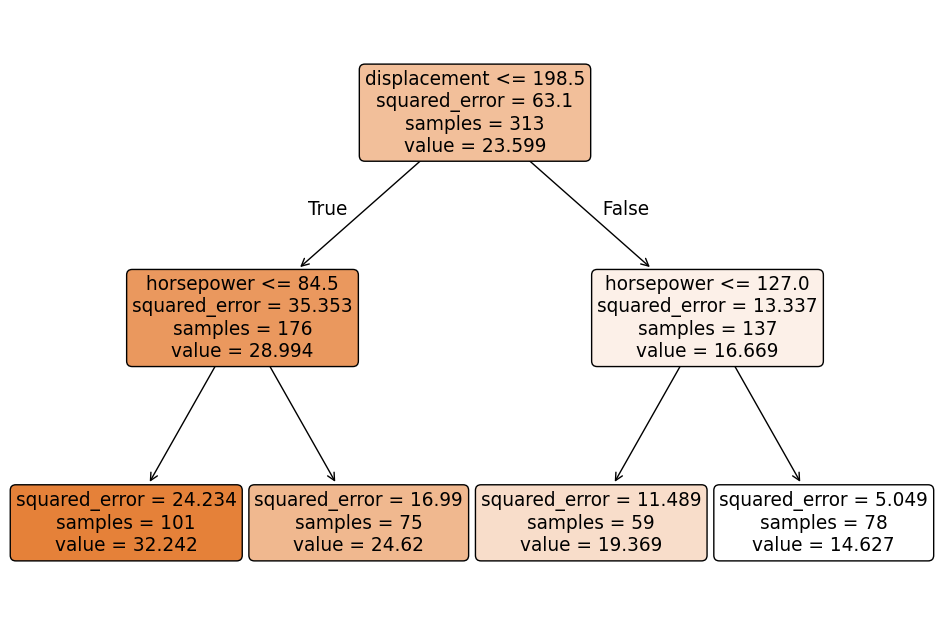

In [61]:
# Appliq le max_depth de 2 au mdèle d'arbre de décis° :
model = DecisionTreeRegressor(max_depth=2)
model.fit(X_train, y_train)

# Trace l'arbre de décis° :
plt.figure(figsize=(12, 8))
plot_tree(model,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          class_names=True)
plt.show()

# MISSION 2 : Classification Trees

# EXERCICE 1

# EN
- Drop rows with missing values
- Turn the species column into numeric (encode it) :
  - Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2
- Turn the island column into numeric (encode it) :
  - Specifically, Torgersen = 0, Biscoe = 1, Dream = 2

# FR
- Supprimer les lignes avec des valeurs manquantes
- Transformez la colonne des espèces en numérique (encodez-la) :
  - Plus précisément, Adelie = 0, Chinstrap = 1 et Gentoo = 2
- Transformez la colonne 'island' en numérique (encodez-la) :
  - Plus précisément, Torgersen = 0, Biscoe = 1, Dream = 2

In [74]:
# Load in the Penguins dataset
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [75]:
# Supprime les lignes avec des vleurs manquantes :
df = df.dropna()

# Encode la colonne 'species' selon les vleurs énoncées :
species_mapping = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
df['species'] = df['species'].map(species_mapping)

# Encode la colonne 'island' selon les vleurs énoncées :
island_mapping = {'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}
df['island'] = df['island'].map(island_mapping)

df.head()

<ipython-input-75-f7a50b600703>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species'] = df['species'].map(species_mapping)
<ipython-input-75-f7a50b600703>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['island'] = df['island'].map(island_mapping)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,Male
1,0,0,39.5,17.4,186.0,3800.0,Female
2,0,0,40.3,18.0,195.0,3250.0,Female
4,0,0,36.7,19.3,193.0,3450.0,Female
5,0,0,39.3,20.6,190.0,3650.0,Male


# EXERCICE 2

# EN
- Save as variable your X and your y (column "sex")
- Using a random state of 42 and a test size of 0.20, split in training and testing sets.

# FR
- Enregistrez comme variable votre X et votre y (colonne "sex")
- Utilisation d'un état aléatoire de 42 et d'une taille de test de 0.20, divisé en ensembles d'apprentissage et de test.

In [78]:
# Exercice 2
# INSERT CODE HERE
# Définis X et y :
# X : Ttes les colonnes sauf 'sex' :
X = df.drop('sex', axis=1)

# y : Colonne cible 'sex' (v.a à prédire) :
y = df['sex']

# 2. Divise le dataset en train et test (état de 42 et test de 0.20) :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Taille de X_train: {X_train.shape}")
print(f"Taille de X_test: {X_test.shape}")
print(f"Taille de y_train: {y_train.shape}")
print(f"Taille de y_test: {y_test.shape}")

Taille de X_train: (266, 6)
Taille de X_test: (67, 6)
Taille de y_train: (266,)
Taille de y_test: (67,)


# EXERCICE 3
# EN

-  Fit a decision tree (Classification)

# FR
- Entraîne l'arbre de decision (Classification)

In [81]:
# Exercice 3
# INSERT CODE HERE
# Définir X et y
X = df.drop('sex', axis=1)
y = df['sex']

# Divise les données en ensbles d'entraînemt et de test (20 % pr le test) :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Créer l'arbre de décis° (classificat°) :
clf = DecisionTreeClassifier(random_state=42)

# Entraîne le mdèle :
clf.fit(X_train, y_train)

# Prédis les vleurs pr les données de test :
y_pred = clf.predict(X_test)

# Calcule et affiche le score d'accuracy :
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score sur les données de test : {accuracy:.4f}")

# Affiche l'imprtance des caractéristiq :
feature_importance = clf.feature_importances_
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance:.4f}")

Accuracy score sur les données de test : 0.8806
species: 0.0000
island: 0.0000
bill_length_mm: 0.0924
bill_depth_mm: 0.4818
flipper_length_mm: 0.0241
body_mass_g: 0.4017


# Exercice 4

# EN
- Predict on the X_test set

# FR
- Réalise une prédiction sur le X_test.

In [85]:
# Exercice 4
# INSERT CODE HERE
# Réalise prédict° sur X_test :
y_pred = clf.predict(X_test)

# Affiche les prédict° :
print("Prédict° sur X_test :")
print(y_pred)

# Affiche les 1ère prédict° avec les indices :
print("\n1ère prédict° :")
print(pd.DataFrame({'Index': X_test.index, 'Prédict°': y_pred}).head())

Prédict° sur X_test :
['Female' 'Female' 'Male' 'Female' 'Male' 'Female' 'Male' 'Male' 'Female'
 'Male' 'Male' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Male' 'Female' 'Male' 'Female' 'Male' 'Male' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Male' 'Female' 'Male' 'Male' 'Female' 'Male'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Male' 'Male' 'Male' 'Female' 'Female' 'Male'
 'Female' 'Female' 'Male' 'Male' 'Female' 'Male' 'Male' 'Male' 'Male'
 'Male' 'Female' 'Female' 'Female' 'Male' 'Female']

1ère prédict° :
   Index Prédict°
0     30   Female
1    317   Female
2     79     Male
3    201   Female
4     63     Male


# Exercice 5

# EN
- Print the accuracy score for the predictions (Train et test)

# FR
- Affiche le score de prédiction (Train & test)

In [89]:
# Exercice 5
# INSERT CODE HERE
# Affiche le score sur l'ensble d'entraînemt :
train_score = clf.score(X_train, y_train)
print(f"Score d'entraînemt : {train_score}")

# Affiche le score sur l'ensble de test :
test_score = clf.score(X_test, y_test)
print(f"Score de test : {test_score}")

Score d'entraînemt : 1.0
Score de test : 0.8805970149253731


Arbre de décis° sujet à l'Overfitting avec 1 vleur de 1.

# Exercice 6

# EN
- Print each feature with importance % using a method from the DecisionTree object.


# FR
- Affiche chaque caractéristique avec le % d'importance en utilisant une méthode de l'objet DecisionTree.

In [92]:
# Exercice 6
# INSERT CODE HERE
# Affiche l'imprtance des caractéristiq :
importances = clf.feature_importances_

# Obtenir les noms des colonnes :
feature_names = X.columns

# Créer 1 DataFrame pr l'affichage :
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Imprtance': importances
})

# Tri par imprtance décroissante :
importance_df = importance_df.sort_values(by='Imprtance', ascending=False)

importance_df

,Feature,Imprtance
3,bill_depth_mm,0.481777
5,body_mass_g,0.401737
2,bill_length_mm,0.092392
4,flipper_length_mm,0.024094
0,species,0.000000
1,island,0.000000


# Exercice 7

# EN
- Plot the decision tree (dataviz)
- Use column names as feature names and a max_depth of only 2

# FR
- Tracer l'arbre de décision (dataviz)
- Utilisez les noms de colonnes comme noms de fonctionnalités et un max_depth de seulement 2

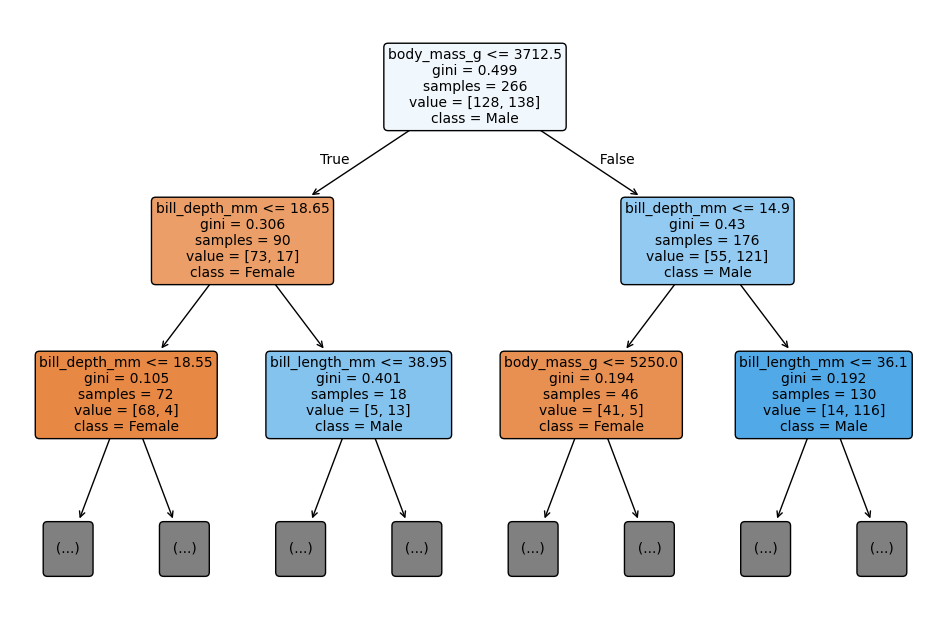

In [94]:
# Exercice 7
# INSERT CODE HERE
# Visualisat° de l'arbre de décis° :
plt.figure(figsize=(12, 8))
plot_tree(clf,
# Noms des fctionnalités
          feature_names=X.columns,
# Classes cibles
          class_names=['Female', 'Male'],
# Rplis les noeuds avec des cleurs
          filled=True,
# Limite la prfondeur de l'arbre à 2
          max_depth=2,
# Rend les noeuds arrondis
          rounded=True,
          fontsize=10)
plt.show()

# EN

# Effects of Changing the Maximum Depth
In this section, we're going to see how changing the max_depth, which is one of the most important hyperparameters when it comes to decision trees, plays a part in the prediction accuracy.

*** This exercise is only done for you to see how big of an impact choosing the correct max_depth is!***

Choosing the correct max_depth (or any other hyperparameter for that matter) is typically done using cross validation or a more advanced technique (Grid Search, Random Search, Bayesian Optimization).

# Machine Learning Optimization
Using the above dataset, fit and predict the train and test sets using a max_depth from 1 to 10. For example, within the first iteration, you would fit the xtrain and ytrain datasets using max_depth=1, predict the xtest using this model, and then record the accuracy. On the next iteration, the max_depth would then be 2, etc.


# FR
# Effets de la modification de la profondeur maximale
Dans cette section, nous allons voir comment la modification de max_depth joue un rôle dans la précision de la prédiction. C'est l'un des hyperparamètres les plus importants pour les arbres de décision.

*** Cet exercice n'est fait que pour vous permettre de voir l'impact du choix de la profondeur max_correcte ! ***

Le choix de la profondeur max_correcte (ou de tout autre hyperparamètre d'ailleurs) se fait généralement à l'aide d'une validation croisée ou d'une technique plus avancée (Recherche par grille, recherche aléatoire, optimisation bayésienne).

# Optimisation d'algorithmes :
À l'aide de l'ensemble de données ci-dessus, ajustez et prédisez les ensembles d'entraînement et de test à l'aide d'un max_depth de 1 à 10.

***Vous allez faire varier la valeur max_depth du decision tree et l'entraîner pour obtenir le score (train et test) sur chaque changement de max_depth. Ce sera une boucle d'entraînement. ***

Par exemple, dans la première itération, vous ajusterez les ensembles de données xtrain et ytrain à l'aide de max_depth = 1, prédisez le xtest à l'aide de ce modèle, et puis enregistrez la précision. À la prochaine itération, le max_depth serait alors de 2, etc.

# Exercice 8

# EN
- Using a random state of 42, fit multiple decision trees with various max depths.
- Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))

# FR
- En utilisant un état aléatoire de 42, ajustez plusieurs arbres de décision avec différentes profondeurs maximales (max_depth).
- Enregistrez ces précisions dans une liste (c'est-à-dire list_of_accuracies.append(accuracy))

In [99]:
# Using a random state of 42, fit multiple decision trees with various max depths.
# Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))
list_of_accuracies_train = []
list_of_accuracies_test = []

for i in range(1, 11):
# INSERT CODE HERE

SyntaxError: incomplete input (<ipython-input-99-668392eb728c>, line 7)

In [106]:
# Plot these accuracies using matplotlib with the accuracies on the y-axis and the max_depth on the x-axis.
# INSERT CODE HERE
# Initialise le classificateur de l'arbre de décis° :
clf = DecisionTreeClassifier(random_state=42)

# Liste pr stocker les scores de précis° (train et test) :
train_accuracies = []
test_accuracies = []

# Boucle sur les vleurs de max_depth de 1 à 10 :
for max_depth in range(1, 11):
    # Ajuste le mdèle avec le max_depth courant :
    clf.set_params(max_depth=max_depth)
    clf.fit(X_train, y_train)

    # Prédict° pr les ensbles d'entraînemt et de test :
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calcul des précis° :
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Ajoute les scores ds les listes :
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

train_accuracies

[0.7293233082706767,
 0.8947368421052632,
 0.9285714285714286,
 0.9360902255639098,
 0.9586466165413534,
 0.9736842105263158,
 0.9887218045112782,
 0.9924812030075187,
 0.9962406015037594,
 0.9962406015037594]

In [102]:
test_accuracies

[0.7014925373134329,
 0.8208955223880597,
 0.835820895522388,
 0.8656716417910447,
 0.835820895522388,
 0.8059701492537313,
 0.8656716417910447,
 0.8805970149253731,
 0.8805970149253731,
 0.8805970149253731]

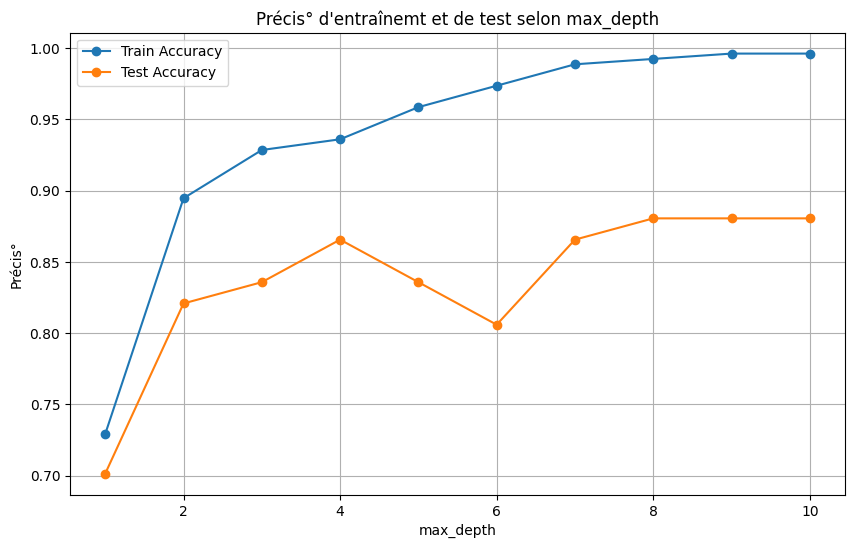

In [108]:
## Visualisat° des résultats :
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), train_accuracies, label='Train Accuracy', marker='o')
plt.plot(range(1, 11), test_accuracies, label='Test Accuracy', marker='o')
plt.title("Précis° d'entraînemt et de test selon max_depth")
plt.xlabel("max_depth")
plt.ylabel("Précis°")
plt.legend()
plt.grid(True)
plt.show()